In [1]:
import textract

import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.corpus import stopwords
from string import punctuation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 



# Text preparation

In [2]:
import re
import unidecode
from unicodedata import normalize

file = "ThesisULorraineFinal.pdf"
text = textract.process(file, extension='pdf',method='pdftotext')

#Eliminate non-wanted characters
text = text.decode('utf8').encode('ascii', errors='ignore')
text = str(text).replace(r"^[a-zA-Z]+$","")
text = re.sub(r'[0-9()\[\]]+', '', text)
text = text.replace("\\", "") 

text = unidecode.unidecode(text)

text = text.lower()

In [3]:
english_stopwords = stopwords.words('english')
non_words = list(punctuation)

non_words.extend(['¿', '¡',"\ ","ns" ,"nt","nz","nr","ni", "nk","nZ",
                 'de','(.)','la','(,','r','en','()','[,','un','n', 'k',
                  '())','.\\n[]','))','(t)','x)','[]', '(.),','l','c','.,'
                 ,'];',':=','..','[],',"\\'",'),','(,t','\\\\','(t,','(u',',t',
                 '.n',"nn","nna","nnn","nnnn", "dun","tn"])
non_words.extend(map(str,range(10)))
stop_words=non_words+english_stopwords


In [4]:
# For checking the non wanted words
freq = {}
for word in text.split():
    if word not in stop_words:
        freq[word] = freq.setdefault(word,0)+1
freq = dict(sorted(freq.items(), key=lambda x: x[1], reverse = True))

# Wordcloud

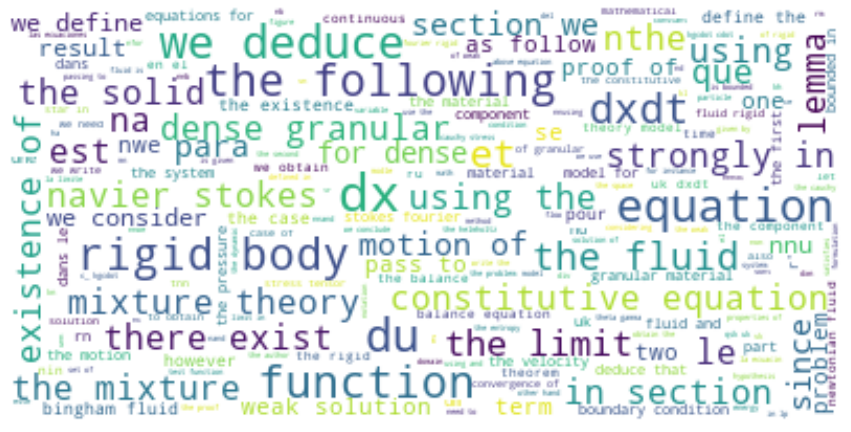

In [5]:
ns_equation="navier_stokes_eq.jpg"
custom_mask = np.array(Image.open(ns_equation))

wordcloud = WordCloud(stopwords = stop_words,max_font_size=25,  background_color="white")
wordcloud.generate(text)


#image_colors = ImageColorGenerator(custom_mask)
#wordcloud.recolor(color_func=image_colors)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud_thesis.png")
plt.show()
